In [2]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Random points')

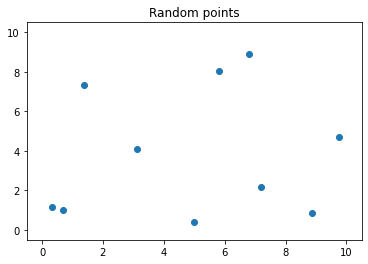

In [102]:
n = 10 # number of points
points = np.random.rand(n, 2) * 10
# print(points)
plt.scatter(points[:, 0], points[:, 1])
plt.xlim([-0.5, 10.5])
plt.ylim([-0.5, 10.5])
plt.title('Random points')

# Grahman scan

A nice property of convex hulls is that given a pair of points $p_0$ and $p_1$ all the remaining points in the convex hull are either on the left or right of the line spanned by these two points. In other words:

$$ p_1 - p_0 \times p - p_0 \quad \textrm{is either positive or negative} \quad \forall p \in convex$$

We can use this property to build the convex hull iteratively.

In [159]:
def orientation_test(p_0, p_1, p_2):
    # return (p_1[1] - p_0[1]) * (p_2[0] - p_1[0]) - (p_1[0] - p_0[0]) * (p_2[1] - p_1[1])
    return np.cross(p_1 - p_0, p_2 - p_0)

Then to compute the Convex hull we can first sort the points along the x-coordinate. Then, we start from the first (sorted) pair of points and check the wheter the cross product of the segments $\bar{p_0p_1}$ $\bar{p_0p_2}$ is positive (or negative?). It should be clear that if p_2 belongs to the conve hull then this product should be negative.

In [166]:
def sort_by_x_axis(points: np.array):
    '''Sort by x-coordinate'''
    return points[points[:, 0].argsort()]


sorted_points = sort_by_x_axis(points)
# Init the list representng the convex hull with the first 2 points
ch = list( [ sorted_points[0], sorted_points[1] ] )
for p in sorted_points[2:]:
    while orientation_test(ch[-2], ch[-1], p) <= 0 and len(ch)>2:
        print(ch[-1])
        print('popping')
        ch.pop()
    ch.append(p)

ch = np.array(ch) # convert back to numpy array 
print('The resulting convex hull is: \n', ch)
print('The convex hull containts {} vertices.'.format(len(ch)))


[1.38983308 7.33814395]
popping
[3.12999906 4.07207876]
popping
[5.81445022 8.02499922]
popping
[6.79851124 8.88666521]
popping
[7.20594905 2.18174684]
popping
The resulting convex hull is: 
 [[0.32169843 1.18326693]
 [0.69941836 0.99551304]
 [5.00738588 0.41267275]
 [8.87506145 0.86063328]
 [9.75022275 4.68987255]]
The convex hull containts 5 vertices.


Text(0.5, 1.0, 'Convex hull')

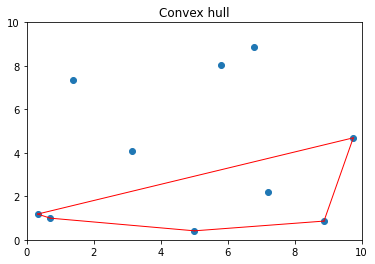

In [167]:
for i in range(len(ch)): # plot convex hull
    if i == len(ch)-1:
        xx = [ch[i][0], ch[0][0]]
        yy = [ch[i][1], ch[0][1]]
    else:
        xx = [ch[i][0], ch[i+1][0]]
        yy = [ch[i][1], ch[i+1][1]]
    plt.plot(xx, yy, 'r', lw=1)

plt.scatter(points[:, 0], points[:, 1], zorder=0)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Convex hull')

# Complexity analysis of Grahman Scan

Good! How long does it take to compute the convex hull?

1. Sorting the points: $\mathcal{O}(nlogn)$
2. iterate through the points: $\mathcal{O}(n)$
3. 

Therefore the total complexity is $\mathcal{O}(nlogn)$. Can we do better than $\mathcal{O}(nlogn)$? As instance, can we solve the problem in $\mathcal{O}(n)$?

Short answer: No, you can't.

Long answer: if you could solve the problem of computing a convex hull in $\mathcal{O}(n)$ you would contradict  (FORGOT NAME THEOREM)


TODO check this and update regardig $\Omega(n)$